In [2]:
import os

In [14]:
trees = []
for i in os.listdir('../results/'):
    if (i[-6:] == 'mp.nwk') & (i[:2] == 'mt'):
        trees.append(i.split('_')[3])

In [21]:
from ete3 import Tree
from Bio import Phylo
from io import StringIO
import re

def robinson_foulds(tree1:'Bio.Phylo.BaseTree', tree2:'Bio.Phylo.BaseTree'):
    f = StringIO()
    Phylo.write(tree1, f, 'newick')
    tree1 = Tree(f.getvalue(), format=1)
    # tree1.prune(tree1.get_leaf_names())
    f = StringIO()
    Phylo.write(tree2, f, 'newick')
    tree2 = Tree(f.getvalue(), format=1)
    # tree2.prune(tree2.get_leaf_names())
    try:
        return tree1.robinson_foulds(tree2)[0:2]
    except:
        return tree1.robinson_foulds(tree2, unrooted_trees=True)[0:2]


def loadtree(file):
    with open(file) as f:
        nwt = f.readline()
        nwt = re.sub(">:[0-9].[0-9]*[\)]", ">:1)", nwt)
        nwt = re.sub(">:[0-9].[0-9]*[,]", ">:1,", nwt)
        nwt = re.sub(">:[0-9].[0-9]*[\n]", ">:1\n", nwt)
        tree = Phylo.read(StringIO(nwt), "newick")
        colors = f.readline()
        colors = colors.split("\t")[:-1]
        return tree, colors

In [25]:
rfs = {'mt_mp':[], 'mt_nj':[], 'dna_mp':[], 'dna_nj':[]}
for tree_no in trees:
    try:
        tree_nj = loadtree(f'../results/mt_constant_mut_{tree_no}_nj.nwk')[0]
        tree_mp = loadtree(f'../results/mt_constant_mut_{tree_no}_mp.nwk')[0]
        tree_dna_nj = loadtree(f'../results/dna_constant_mut_{tree_no}_nj.nwk')[0]
        tree_dna_mp = loadtree(f'../results/dna_constant_mut_{tree_no}_mp.nwk')[0]
        tree_gt = loadtree(f'../results/linear_tree_gt_{tree_no}.nwk')[0]
        for i in tree_gt.get_terminals():
            i.name = i.name[1:-1]
        rfs['mt_mp'].append(robinson_foulds(tree_gt, tree_mp))
        rfs['mt_nj'].append(robinson_foulds(tree_gt, tree_nj))
        rfs['dna_mp'].append(robinson_foulds(tree_gt, tree_dna_mp))
        rfs['dna_nj'].append(robinson_foulds(tree_gt, tree_dna_nj))
    except:
        None

In [28]:
import pandas as pd
import seaborn as sns

In [30]:
df = pd.DataFrame(columns=['mt_mp', 'mt_nj', 'dna_mp', 'dna_nj'])

In [34]:
for k in rfs.keys():
    df[k] = [i[0]/i[1] for i in rfs[k]]

<AxesSubplot: >

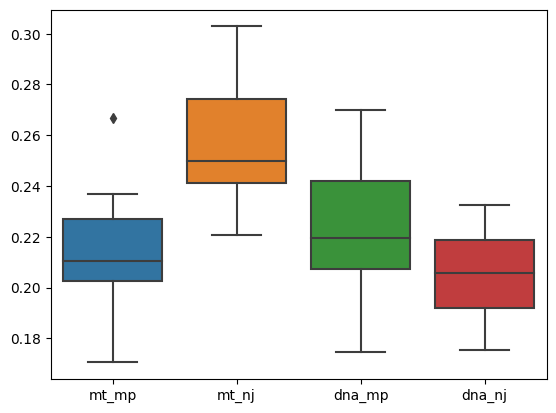

In [36]:
sns.boxplot(df)

In [35]:
df

,mt_mp,mt_nj,dna_mp,dna_nj
0,0.227683,0.243731,0.250752,0.219659
1,0.215647,0.252758,0.176530,0.176530
2,0.200602,0.244734,0.212243,0.192578
3,0.205617,0.249749,0.230692,0.213641
4,0.222668,0.265797,0.250752,0.215647
5,0.170512,0.220662,0.196787,0.196590
6,0.266800,0.297894,0.217653,0.217653
7,0.190572,0.227683,0.238716,0.225677
8,0.232698,0.302909,0.218656,0.196590
9,0.175527,0.234704,0.248746,0.205617
